## Task 1

In [2]:
import array
import numpy as np
import matplotlib.pyplot as plt


binfpath="/fs/lustre/cita/hqchen/data/z-ifrit-a=0.1401.bin"
with open(binfpath,'rb') as f:
    binarydata=f.read()
lllen=8; flen=4; ilen=4 

N=1024

firstfield=lllen*2+3*ilen

nextfield=firstfield

xHI=array.array('f',binarydata[nextfield+lllen:nextfield+lllen+N**3*flen])
xHI=np.reshape(xHI,(N,N,N),order='F')

nextfield+=lllen+N**3*flen
delta=array.array('f',binarydata[nextfield+lllen:nextfield+lllen+N**3*flen])
delta=np.reshape(delta,(N,N,N),order='F')

nextfield+=lllen+N**3*flen
T=array.array('f',binarydata[nextfield+lllen:nextfield+lllen+N**3*flen])
T=np.reshape(T,(N,N,N),order='F')





/tmp/ipykernel_214818/591149048.py:8: RuntimeWarning: divide by zero encountered in log10
  im2  = ax2.imshow(np.log10(delta[0]))
/tmp/ipykernel_214818/591149048.py:14: RuntimeWarning: divide by zero encountered in log10
  im3 = ax3.imshow(np.log10(T[0]))


Text(0.5, 0.98, 'A plot of a slice of $\\log(T)$')

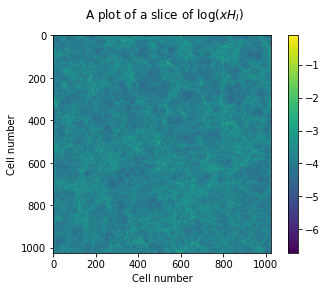

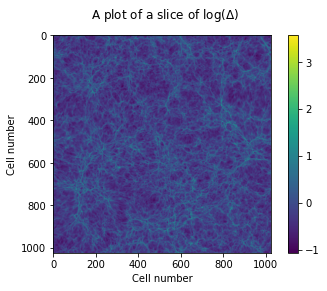

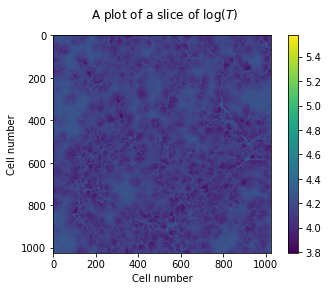

In [3]:
fig1, ax1 = plt.subplots()
im1 = ax1.imshow(np.log10(xHI[0]))
ax1.set(xlabel = "Cell number", ylabel = "Cell number")
fig1.colorbar(im1)
fig1.suptitle("A plot of a slice of $\log(xH_I)$")

fig2, ax2 = plt.subplots()
im2  = ax2.imshow(np.log10(delta[0]))
fig2.colorbar(im2)
ax2.set(xlabel = "Cell number", ylabel = "Cell number")
fig2.suptitle("A plot of a slice of $\log(\Delta)$")

fig3, ax3 = plt.subplots()
im3 = ax3.imshow(np.log10(T[0]))
fig3.colorbar(im3)
ax3.set(xlabel = "Cell number", ylabel = "Cell number")
fig3.suptitle("A plot of a slice of $\log(T)$")

## Task 2

In [4]:
import astropy

In [5]:
from astropy.cosmology import WMAP9 as cosmo
from astropy import units as u
crt_dns = cosmo.critical_density(6)
mean_gas_density = crt_dns*cosmo.Ob(6)
print(mean_gas_density)

1.432778841086186e-28 g / cm3


## Task 3

In [6]:
from astropy.constants import m_p
p = m_p.to(u.g)


In [24]:
print(delta.max())
index = np.where(delta == delta.max())
print(index[0])

39938.367
[203]


In [30]:
print(index[2])
print(delta[index][0])

[460]
39938.367


In [9]:
sigma  = 4.48e-18*u.cm**2
nH =  (0.76*mean_gas_density/p)
nHI = xHI*nH
nHI = nHI.astype('float128')
cml = (40/0.68)/1024*u.Mpc 
ds = cml*(1/(1+6))
ds = ds.to(u.cm)
dT = sigma * nHI * ds

In [32]:
print(dT[index][0])

2.2700645736128338
6.293437130197587


In [7]:
print(nHI.max())

5.547614273382351e-05 1 / cm3


## Task 4

In [8]:
from numpy import float128
print(nHI)

[[[6.74571377e-09 6.38827302e-09 5.75865577e-09 ... 1.07600648e-08
   8.21360135e-09 7.04414260e-09]
  [7.67662289e-09 6.92509960e-09 6.13529849e-09 ... 1.13985843e-08
   9.96054794e-09 8.55018278e-09]
  [9.01550923e-09 7.51253726e-09 6.50632348e-09 ... 1.14072840e-08
   1.12177583e-08 1.05493712e-08]
  ...
  [5.40711653e-09 5.72221870e-09 6.19928953e-09 ... 6.03759931e-09
   5.55259971e-09 5.45984546e-09]
  [5.71314507e-09 5.72291681e-09 5.85148463e-09 ... 7.31123873e-09
   6.16871665e-09 5.86614579e-09]
  [6.06233908e-09 5.96980865e-09 5.72571146e-09 ... 9.11899800e-09
   6.97984026e-09 6.31654506e-09]]

 [[5.48221868e-09 5.28250510e-09 5.17780352e-09 ... 8.64833005e-09
   7.15157933e-09 6.03492856e-09]
  [6.61523991e-09 5.69851810e-09 5.04244824e-09 ... 9.86796511e-09
   9.04403130e-09 7.89581023e-09]
  [8.48688053e-09 6.67445255e-09 5.43424594e-09 ... 9.99739669e-09
   1.04928599e-08 1.01232711e-08]
  ...
  [5.35914690e-09 5.90746518e-09 6.73172940e-09 ... 5.94980287e-09
   5.42529

In [33]:
from numpy import float128

new_tau = dT[index][0]
print(new_tau)
percent = float128(10)
percent = float128(np.exp(-new_tau)*100)
print(percent)

2.2700645736128338
10.3305509057770924745


## Task 5

In [35]:
halofpath="/fs/lustre/cita/hqchen/data/hlist_0.14005.list"
halodata = np.loadtxt(halofpath, skiprows = 63) 

halomass = halodata[:, 10]




#mass = []
#for i in range(len(halodata)):
#    mass = np.append(mass, float128(halodata[i][83:94]))

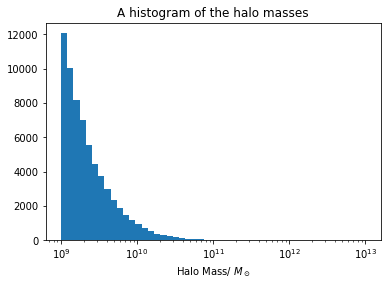

In [37]:
plt.hist(halomass, bins = np.logspace(start =np.log10(10**9), stop = np.log10(10**13)))
plt.gca().set_xscale("log")
plt.title("A histogram of the halo masses")
plt.xlabel("Halo Mass/ $M_\odot$")
plt.show()


## Task 6

/tmp/ipykernel_214818/4078942385.py:25: RuntimeWarning: divide by zero encountered in log10
  im2  = ax2.imshow(np.log10(delta[0]))
/tmp/ipykernel_214818/4078942385.py:33: RuntimeWarning: divide by zero encountered in log10
  im3 = ax3.imshow(np.log10(T[0]))


Text(0.5, 0.98, 'A plot of a slice of $\\log(T)$')

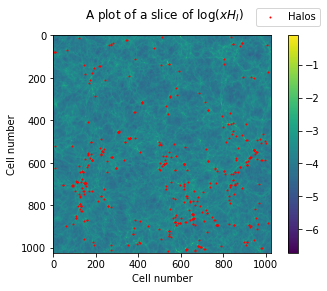

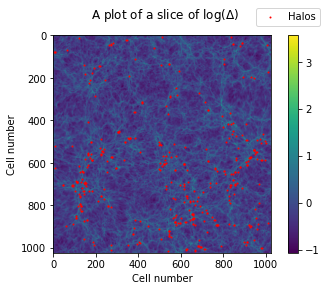

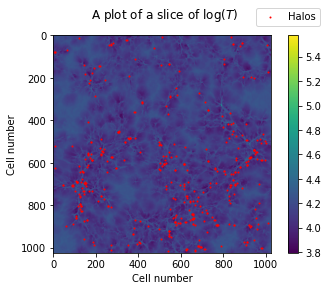

In [63]:
x, y, z = halodata[:, 17], halodata[:, 18], halodata[:, 19]

m = 1024*0.989391/(40)
x, y, z = m*x, m*y, m*z




x_int = x.astype(int)
indices = np.where(x_int ==0)
y_int = y[indices]
z_int = z[indices]


fig1, ax1 = plt.subplots()
im1 = ax1.imshow(np.log10(xHI[0]))
ax1.set(xlabel = "Cell number", ylabel = "Cell number")
ax1.scatter(z_int, y_int, color='red', s=1, label= 'Halos')
ax1.legend(loc = 'upper right', bbox_to_anchor = (1.25, 1.15))

fig1.colorbar(im1)
fig1.suptitle("A plot of a slice of $\log(xH_I)$")

fig2, ax2 = plt.subplots()
im2  = ax2.imshow(np.log10(delta[0]))
ax2.scatter(z_int, y_int, color='red', s=1, label= 'Halos')
ax2.legend(loc = 'upper right', bbox_to_anchor = (1.25, 1.15))
fig2.colorbar(im2)
ax2.set(xlabel = "Cell number", ylabel = "Cell number")
fig2.suptitle("A plot of a slice of $\log(\Delta)$")

fig3, ax3 = plt.subplots()
im3 = ax3.imshow(np.log10(T[0]))
ax3.scatter(z_int, y_int, color='red', s=1, label= 'Halos')
ax3.legend(loc = 'upper right', bbox_to_anchor = (1.25, 1.15))
fig3.colorbar(im3)
ax3.set(xlabel = "Cell number", ylabel = "Cell number")
fig3.suptitle("A plot of a slice of $\log(T)$")



/tmp/ipykernel_214818/2493785927.py:11: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig4.colorbar(im1)


Text(0.5, 0.98, 'A plot of a slice of $\\log(xH_I)$')

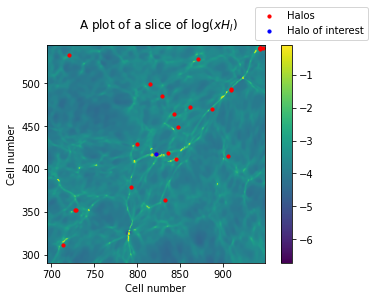

In [68]:

pointz, pointy = z[indices[0][0]], y[indices[0][0]]

fig4, ax4 = plt.subplots()
im4 = ax4.imshow(np.log10(xHI[0]))
ax4.set(xlabel = "Cell number", ylabel = "Cell number")
ax4.set_xlim([pointz-5*m, pointz + 5*m])
ax4.set_ylim([pointy - 5*m, pointy+5*m])
ax4.scatter(z_int, y_int, color='red', s=10, label= 'Halos')
ax4.scatter(pointz, pointy, color = 'blue', s=10, label = 'Halo of interest')
ax4.legend(loc = 'upper right', bbox_to_anchor = (1.5, 1.20))
fig4.colorbar(im1)
fig4.suptitle("A plot of a slice of $\log(xH_I)$")


## Task 7

/tmp/ipykernel_214818/2979926674.py:19: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig4.colorbar(im1)


Text(0.5, 0.98, 'A plot of a slice of $\\log(xH_I)$')

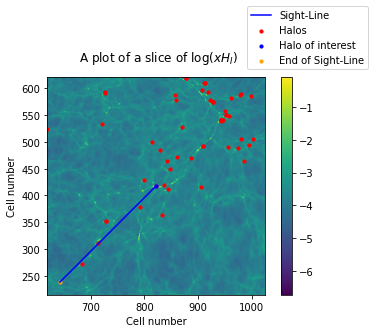

In [124]:
from sympy.solvers import solve
from sympy import Symbol

length = 10*m

pointsz = [pointz, pointz - length/np.sqrt(2)]
pointsy = [pointy, pointy - length/np.sqrt(2) ]

fig4, ax4 = plt.subplots()
im4 = ax4.imshow(np.log10(xHI[0]))
ax4.set(xlabel = "Cell number", ylabel = "Cell number")
ax4.set_xlim([pointz-8*m, pointz + 8*m])
ax4.set_ylim([pointy - 8*m, pointy+8*m])
ax4.plot(pointsz, pointsy, color = 'blue', label = 'Sight-Line')
ax4.scatter(z_int, y_int, color='red', s=10, label= 'Halos')
ax4.scatter(pointz, pointy, color = 'blue', s=10, label = 'Halo of interest')
ax4.scatter(pointz - length/np.sqrt(2), pointy - length/np.sqrt(2), color = 'orange', s=10, label = 'End of Sight-Line')
ax4.legend(loc = 'upper right', bbox_to_anchor = ( 1.5, 1.35))
fig4.colorbar(im1)
fig4.suptitle("A plot of a slice of $\log(xH_I)$")


[642 238]
0.39824623
3.7031121


Text(0, 0.5, 'Density contrast')

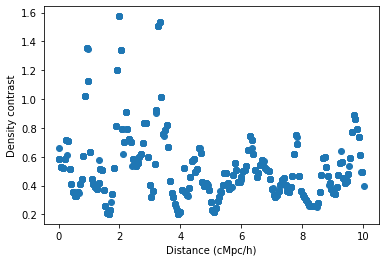

In [125]:
t = np.linspace(0, 1, 1000)
sight = np.zeros((len(t), 2))
for i in range(len(t)):
    sight[i] = t[i]*(np.array((-length/np.sqrt(2), -length/np.sqrt(2)))) + np.array((pointz, pointy))


sight = np.around(sight)
sight = sight.astype(int)
print(sight[999])
print(delta[0][sight[999][0]][sight[999][1]])
print(delta[0][1001][597])
density = np.zeros(len(t))

for i in range(len(t)):
    density[i] = delta[0][sight[i][0]][sight[i][1]]

distance = np.zeros(len(t))
for i in range(len(t)):
    distance[i] = np.linalg.norm(sight[i]- np.array((pointz, pointy)))
distance = distance/m
plt.scatter(distance, density)
plt.xlabel('Distance (cMpc/h)' )
plt.ylabel('Density contrast')